---

# Predicting Kangaroo Nasal Length using Linear Regression

By: Laura Moses

---

## Definition
Linear Regression is a supervised learning algorithm that is applied to real valued target functions in order to *predict* a range of possible outputs for a given input. The algorithm assumes the targets are close to some linear combination of the featuress of the input data. Unlike other machine learning algorithms, linear regression has a closed-form solution. That is, there is an equation that solves linear regression. 

---

### Uses
The closed-from linear regression algorithm is commonly used for:
* Predicting outputs from inputs

---

### Examples
* Can use LR to relate the force for stretching a spring to the distance the spring stretches (Hook's Law)
* Can use LR to relate the salary of a developer to thier age and experience

$$x = feature \\ y = label$$

Suppose to we want to know the possible salary for $x^*$? To answer this, we need a line, but how can we find this line? 
Answer: Solve a system of equations:

$$y^1 = w_1x^1 + w_2$$
$$y^2 = w_1x^2 + w_2$$
$$y^3 = w_1x^3 + w_2$$

$$\left[ {\begin{array}{cc}
x^1 & 1\\
x^2 & 1\\
x^3 & 1\\
 \end{array}} \right]\left[ {\begin{array}{c}
w_1 \\
w_2\\
 \end{array}} \right]
 =
 \left[ {\begin{array}{c}
y^1 \\
y^2 \\
y^3 \\
 \end{array}} \right]$$
 
We want: $$Xw = Y$$

this is likely not invertible, so the best we can do is solve for an approximation, 

say $\hat w$ with $X\hat w \approx y$

$$X^TX\hat w = X^T Y \rightarrow \hat w = (X^TX)^{-1}X^Ty$$
where $(X^TX)^{-1}$ is the *Psuedo-Inverse of $X$*

Prediction is given by the equation $$y \approx  \hat w_1 x^* + \hat w_2$$

---

## Linear Regression Implementation 

It is thought that you can predict the nasal the width of a gray kangaroo from it's nasal length. The data set being used to investigate this comes from Cengage and can be found [here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html), but is also available as `kangaroo_data.csv` file within this repository.

The data set includes two variables:
* $X$ = nasal length (mm)
* $Y$ = nasal width (mm)

The measurements were taken from randomly sampled male gray kangaroos, displayed in the *Australian Journal of Zoology, Vol. 28, (pages 607-613)*. 

---

The following packages will be needed to run the code below: 

* Plots [documentation](http://docs.juliaplots.org/latest/)
* Random [documentationra](https://docs.julialang.org/en/v1/stdlib/Random/)
* CSV [documentation](https://csv.juliadata.org/stable/)
* DataFrames [documentation](https://dataframes.juliadata.org/stable/)

---

In [1]:
# Import Packages
using Plots
theme(:ggplot2)
using Random
using CSV
using DataFrames

---

First, we will read in the `kangaroo_data.csv` as a `Data.Frame` and store the nasal length values as the predictor variable $x$, and the nasal width as the response variable $y$. The data is then stored in ordered pairs $(x,y)$ as an array of tuples. Now, the data is split into training and test sets, with approximately $70\%$ of the data being used for training. 

---

In [2]:
# Read in data as DataFrame
kangaroos = CSV.read("kangaroo_data.csv", DataFrame);

# Select X and Y data 
length_x = [x for x in kangaroos.X]
width_y = [y for y in kangaroos.Y]

# Make an array of tuples 
data = [x for x in zip(length_x, width_y)]

# Randomly select data points from the full data set to make a training data set
train_x = randsubseq(length_x, .7)
train_y = [x[2] for x in data if x[1] in train_x]
train_data = [x for x in zip(train_x, train_y)]

test_data = [x for x in data if x ∉ train_data];

---

To visualize, we wll plot the training data set below: 

---

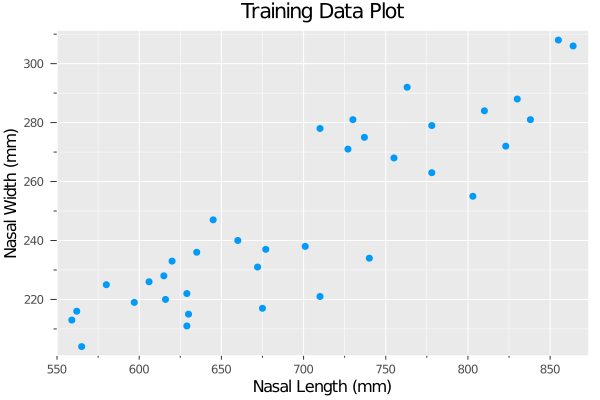

In [3]:
# plot train
scatter([p for p in train_data],
    xaxis = "Nasal Length (mm)",
    yaxis = "Nasal Width (mm)",
    title = "Training Data Plot",
    legend = false)

---

Now, we need to build the matrix $X$ by combining the column of $x$ values with a column of $1$'s, and solve for $\hat w$

---

In [4]:
# First make the matrix X 
X = ones(length(train_x), 2)
X[:,1] = train_x

# Next solve for ŵ
ŵ = (X'X)\(X'*train_y)

# Note: If Ax=b, then x=A\b solves the system 

2-element Array{Float64,1}:
  0.29215525970781453
 44.27475708613519

---

Using the $\hat w$ calculated from our training data, we now define a prediction function to use on our test data. The plot below shows the line derived by regression in red through the data in blue.

---

In [5]:
# Define the regression line, i.e., the prediction function 
prediction(x) = ŵ[1]*x + ŵ[2];

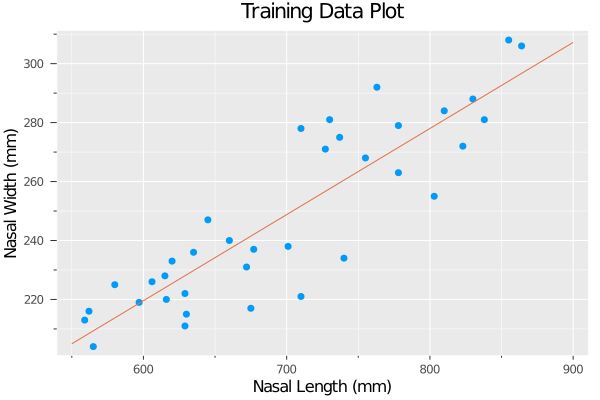

In [6]:
# plot train
scatter([p for p in train_data],
        xaxis = "Nasal Length (mm)",
        yaxis = "Nasal Width (mm)",
        title = "Training Data Plot",
        legend = false)
plot!([(x,prediction(x)) for x = 550:900])

---

Now, to visualize the line with the test data, we first determine the range of $x$ values in the test data to plot. Then, using the `prediction` function, the fitted model line is plotted alongside the blue test data points.  

---

In [15]:
# check bounds for plotting
minimum(test_data) # 493
maximum(test_data) # 816

(816, 275)

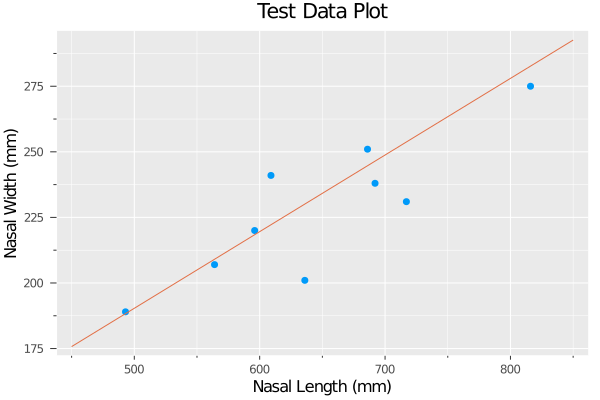

In [16]:
# plot test
scatter([p for p in test_data],
        xaxis = "Nasal Length (mm)",
        yaxis = "Nasal Width (mm)",
        title = "Test Data Plot",
        legend = false)
plot!([(x,prediction(x)) for x = 450:850])

---

To build a prediction interval for our regression model, we define an error array below, using the training data: 

---

In [17]:
error_array = [abs(prediction(x[1]) - x[2]) for x in train_data];

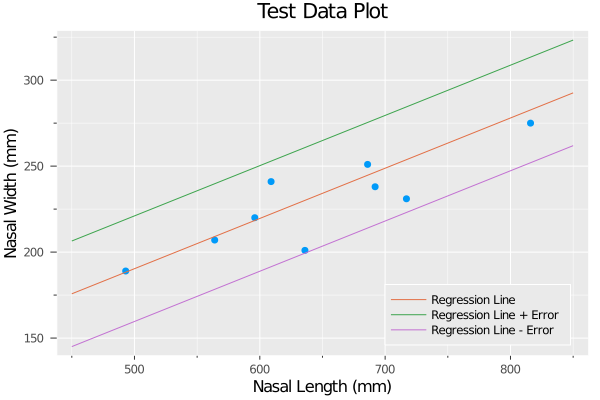

In [20]:
# plot test
scatter([p for p in test_data],
        label = false,
        xaxis = "Nasal Length (mm)",
        yaxis = "Nasal Width (mm)",
        title = "Test Data Plot",
        legend = :bottomright)
plot!([(x, prediction(x)) for x = 450:850], 
        label = "Regression Line")
plot!([(x, prediction(x) + maximum(error_array)) for x = 450:850], 
        label = "Regression Line + Error")
plot!([(x, prediction(x) - maximum(error_array)) for x = 450:850],
        label = "Regression Line - Error")

---

We can see above that all our points lie within our interval. Now, we write a predicition interval function to return an interval predicted $y$ when given a feature $x$. To verify our results, we display the actual pairs in the test data and make sure true $y$ is within the prediction interval.

---

In [23]:
prediction_interval(x) = (prediction(x) - maximum(error_array), prediction(x) + maximum(error_array));

In [24]:
# View actual data pairs
test_data

9-element Array{Tuple{Int64,Int64},1}:
 (609, 241)
 (564, 207)
 (493, 189)
 (596, 220)
 (636, 201)
 (692, 238)
 (686, 251)
 (717, 231)
 (816, 275)

In [25]:
# predict y when x = 609
prediction_interval(609) # actual = 241

(191.49231876951072, 252.90230172687777)

In [26]:
# predict y when x = 596
prediction_interval(596) # actual = 220

(187.69430039330913, 249.10428335067618)

In [28]:
# predict y when x = 692
prediction_interval(692) # actual = 238

(215.74120532525933, 277.1511882826264)

In [29]:
# predict y when x = 816
prediction_interval(816) # actual = 275

(251.9684575290283, 313.37844048639533)

---

## Conclusion 

For all of the tests done above, the actual $y$ was within the prediction interval, giving us confidence in our interval accuracy. Now, we can use our fitted model to interpolate and predict other unknown values for nasal width by inputting the nasal length. For example, what can we expect a kangaroo's nasal width to be if the nasal length is $700$ mm?

---

In [27]:
# predict y when x = 700
prediction_interval(700)

(218.07844740292185, 279.48843036028893)

---

We can, with reasonable certainty, predict that a kangaroo with a nasal length of $700$ mm has a corresponding nasal width between $218$ mm and $279.5$ mm. 

---